<a href="https://colab.research.google.com/github/henryspg/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-12 19:29:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-12 19:29:41 (287 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [5]:
df = pd.read_csv('house-votes-84.data')
print(df.shape)
df.head()

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [0]:
#replace column name

df.rename(columns={'republican': 'party','n': 'handicapped-infants','y': 'water-project',
                   'n.1': 'budget-resolution','y.1': 'physician-fee-freeze','y.2': 'el-salvador-aid',
                   'y.3': 'relig-grp-schools','n.2': 'anti-satellite-ban','n.3': 'aid-to-nicaraguan-contras', 'n.4': 'mx-missile',
                    'y.4': 'immigration','?': 'synfuels','y.5': 'education-spending',
                   'y.6':'right-to-sue', 'y.7' :'crime', 'n.5':'duty-free', 'y.8':'export-SA' }, inplace=True)

In [11]:
df=df.replace({'y': 1, 'n': 0 , '?':np.NaN  })
df.head()

,party,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relig-grp-schools,anti-satellite-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels,education-spending,right-to-sue,crime,duty-free,export-SA
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
1,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [33]:
# check for the column: immigration & sample for each party

rep_im = df['immigration'].loc[df['party']=='republican'].dropna()
dem_im = df['immigration'].loc[df['party']=='democrat'].dropna()

print("republican:  ", rep_im.shape)
print("democrat:    ",dem_im.shape)
print()


republican:   (164,)
democrat:     (263,)



In [48]:
#Find out total #samples  and mean value

df_imm = df['immigration'].dropna()  ##  I will use the total# instead of by party.

print("mean   : ", df_imm.mean())
print("length : ", len(df_imm))

mean   :  0.5035128805620609
length :  427


In [54]:
df_imm.mean()

0.5035128805620609

In [0]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = 427
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)
 

In [79]:
lower, mean, upper = confidence_interval(df_imm)

print("lower bound = ",lower)
print("mean value  = ",mean)
print("upper bound = ",upper)

lower bound =  0.45589849303312246
mean value  =  0.5035128805620609
upper bound =  0.5511272680909993


The probablity of both party vote "YES" o the immigration bill is:  
between  0.4559 - 0.5512.

**# Prepare the graph**

In [81]:
dem = df[df['party']=='democrat']
dem.head()

,party,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relig-grp-schools,anti-satellite-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels,education-spending,right-to-sue,crime,duty-free,export-SA
1,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
issues = dem.drop('party', axis=1)

In [100]:
confidence_intervals = []

for col in issues.columns:
  col_cleaned = issues[col].dropna()
  confidence_intervals.append(confidence_interval(col_cleaned))

confidence_intervals

[(0.5580543996469143, 0.6046511627906976, 0.651247925934481),
 (0.45443288251704234, 0.502092050209205, 0.5497512179013677),
 (0.8584603670838331, 0.8884615384615384, 0.9184627098392437),
 (0.03250356630422839, 0.05405405405405406, 0.07560454180387972),
 (0.17648689676832482, 0.21568627450980393, 0.25488565225128307),
 (0.4291435446947172, 0.47674418604651164, 0.5243448273983061),
 (0.7322292168530806, 0.7722007722007722, 0.8121723275484638),
 (0.7930071479674132, 0.8288973384030418, 0.8647875288386704),
 (0.717246676810187, 0.7580645161290323, 0.7988823554478776),
 (0.42391000338975743, 0.4714828897338403, 0.5190557760779232),
 (0.4582323471090698, 0.5058823529411764, 0.5535323587732831),
 (0.11105975598709326, 0.14457831325301204, 0.1780968705189308),
 (0.24644901999387875, 0.2896825396825397, 0.33291605937120067),
 (0.3047310673779668, 0.35019455252918286, 0.3956580376803989),
 (0.5916314107467906, 0.6374501992031872, 0.6832689876595839),
 (0.9116448289396927, 0.9351351351351351, 0.

In [102]:
CI = pd.DataFrame(confidence_intervals)
CI.columns = ['lower', 'mean', 'upper']
CI['moe']  = CI['upper'] - CI['mean'] 
CI.head()

,lower,mean,upper,moe
0,0.558054,0.604651,0.651248,0.046597
1,0.454433,0.502092,0.549751,0.047659
2,0.858460,0.888462,0.918463,0.030001
3,0.032504,0.054054,0.075605,0.021550
4,0.176487,0.215686,0.254886,0.039199


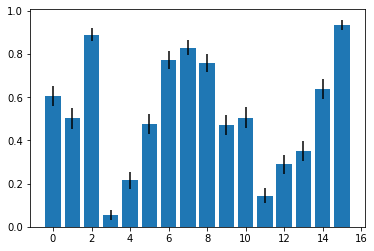

In [106]:
plt.bar(x=range(0,16,1), height=CI['mean'], yerr=CI['moe'])
plt.show()

The lowest confidence level of democrat is on column#3: Physician fee.  
The highest confidence level of democrat is on column#15: South Africa

##Chi2

In [107]:
#  get the data

dx = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(dx.shape)
dx.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [108]:
observed = pd.crosstab(dx['education'], dx['workclass'])
observed

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
education,,,,,,,,
10th,6,31,2,695,19,67,13,0
11th,9,36,1,923,14,60,14,0
12th,5,19,0,333,7,19,10,0
1st-4th,0,4,0,136,2,13,1,0
5th-6th,1,9,0,266,4,19,4,0
7th-8th,2,28,1,424,14,94,10,1
9th,3,23,0,387,10,34,6,0
Assoc-acdm,55,88,0,729,35,71,41,1
Assoc-voc,38,86,0,1005,38,108,46,0


In [111]:
summary = pd.crosstab(dx['education'], dx['workclass'], margins=True)
summary

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
education,,,,,,,,,
10th,6,31,2,695,19,67,13,0,833
11th,9,36,1,923,14,60,14,0,1057
12th,5,19,0,333,7,19,10,0,393
1st-4th,0,4,0,136,2,13,1,0,156
5th-6th,1,9,0,266,4,19,4,0,303
7th-8th,2,28,1,424,14,94,10,1,574
9th,3,23,0,387,10,34,6,0,463
Assoc-acdm,55,88,0,729,35,71,41,1,1020
Assoc-voc,38,86,0,1005,38,108,46,0,1321


In [112]:
# % of local goverment responders:  
2093/30725

0.06812042310821806

In [114]:
# Highest % of responders working on private job is graduated from High School:
7780/9969

0.7804192998294713

1) Null Hypothesis:

There is no relationship between race and sex (they're independent)

2) Alternative Hypothesis

There is a relationshipo

3) Confidence Level: 95%

In [121]:
col_totals = summary.iloc[15:16, 0:8].values[0]

col_totals

array([ 254,  387,    2, 5094,  226,  486,  325,    3])

In [125]:
row_totals = summary.iloc[0:16, 6:7].values.T[0]
row_totals

array([ 13,  14,  10,   1,   4,  10,   6,  41,  46, 270,  89, 268, 169,
         1,  31, 325])

In [126]:
sample_size = len(dx)
sample_size

32561

In [127]:
expected = []
for i in range(len(row_totals)):
  expected_row = []
  for column in col_totals:
    expected_val = column*row_totals[i]/sample_size
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(16, 8)
[[1.01409662e-01 1.54509997e-01 7.98501275e-04 2.03378275e+00
  9.02306440e-02 1.94035810e-01 1.29756457e-01 1.19775191e-03]
 [1.09210405e-01 1.66395381e-01 8.59924449e-04 2.19022757e+00
  9.71714628e-02 2.08961641e-01 1.39737723e-01 1.28988667e-03]
 [7.80074322e-02 1.18853844e-01 6.14231750e-04 1.56444827e+00
  6.94081877e-02 1.49258315e-01 9.98126593e-02 9.21347624e-04]
 [7.80074322e-03 1.18853844e-02 6.14231750e-05 1.56444827e-01
  6.94081877e-03 1.49258315e-02 9.98126593e-03 9.21347624e-05]
 [3.12029729e-02 4.75415374e-02 2.45692700e-04 6.25779307e-01
  2.77632751e-02 5.97033261e-02 3.99250637e-02 3.68539050e-04]
 [7.80074322e-02 1.18853844e-01 6.14231750e-04 1.56444827e+00
  6.94081877e-02 1.49258315e-01 9.98126593e-02 9.21347624e-04]
 [4.68044593e-02 7.13123061e-02 3.68539050e-04 9.38668960e-01
  4.16449126e-02 8.95549891e-02 5.98875956e-02 5.52808575e-04]
 [3.19830472e-01 4.87300759e-01 2.51835017e-03 6.41423789e+00
  2.84573570e-01 6.11959092e-01 4.09231903e-01 3.777525

In [130]:
chi2 = ((observed - expected)**2 / expected).sum().sum()
chi2

4877347.590478027

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)